In [4]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor



from sklearn.model_selection import GridSearchCV

In [8]:
 #Loading the dataset
 Bike_sharing_df = pd.read_csv("/content/Group_8_clean_data.csv")

In [9]:
#Dropping the unnecsessary columns
Bike_sharing_df= Bike_sharing_df.drop("Unnamed: 0",axis=1)
Bike_sharing_df=Bike_sharing_df.drop("total riders",axis=1)

In [10]:
#After dropping
Bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Count
0,winter,2011,jan,0,0,saturday,Holiday,1,0.24,0.2879,0.81,0.0000,3,13,16
1,winter,2011,jan,1,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,8,32,40
2,winter,2011,jan,2,0,saturday,Holiday,1,0.22,0.2727,0.80,0.0000,5,27,32
3,winter,2011,jan,3,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,3,10,13
4,winter,2011,jan,4,0,saturday,Holiday,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,2012,dec,19,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,11,108,119
17373,winter,2012,dec,20,0,monday,WorkingDay,2,0.26,0.2576,0.60,0.1642,8,81,89
17374,winter,2012,dec,21,0,monday,WorkingDay,1,0.26,0.2576,0.60,0.1642,7,83,90
17375,winter,2012,dec,22,0,monday,WorkingDay,1,0.26,0.2727,0.56,0.1343,13,48,61


CHanging categorical variable(s) into dummy/indicator variables.

In [11]:
#Change categorical into dummies
seasons = pd.get_dummies(Bike_sharing_df['season'], drop_first=True)
seasons

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
17372,0,0,1
17373,0,0,1
17374,0,0,1
17375,0,0,1


In [12]:
weekday = pd.get_dummies(Bike_sharing_df['weekday'], drop_first=True)

weekday

,monday,saturday,sunday,thursday,tuesday,wednessday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
17372,1,0,0,0,0,0
17373,1,0,0,0,0,0
17374,1,0,0,0,0,0
17375,1,0,0,0,0,0


In [13]:
month = pd.get_dummies(Bike_sharing_df['month'], drop_first=True)
month

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17372,0,1,0,0,0,0,0,0,0,0,0
17373,0,1,0,0,0,0,0,0,0,0,0
17374,0,1,0,0,0,0,0,0,0,0,0
17375,0,1,0,0,0,0,0,0,0,0,0


In [14]:
workingday =  pd.get_dummies(Bike_sharing_df['workingday'], drop_first=True)
workingday

,WorkingDay
0,0
1,0
2,0
3,0
4,0
...,...
17372,1
17373,1
17374,1
17375,1


In [15]:
Bike_sharing_df['year'] = Bike_sharing_df['year'].map({2011 : 0 , 2012:1})


In [16]:
bike_sharing_df= pd.concat([Bike_sharing_df,seasons,workingday,weekday,month],axis=1)
bike_sharing_df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,winter,0,jan,0,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
1,winter,0,jan,1,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
2,winter,0,jan,2,0,saturday,Holiday,1,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,0
3,winter,0,jan,3,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
4,winter,0,jan,4,0,saturday,Holiday,1,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,winter,1,dec,19,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17373,winter,1,dec,20,0,monday,WorkingDay,2,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17374,winter,1,dec,21,0,monday,WorkingDay,1,0.26,0.2576,...,1,0,0,0,0,0,0,0,0,0
17375,winter,1,dec,22,0,monday,WorkingDay,1,0.26,0.2727,...,1,0,0,0,0,0,0,0,0,0


In [17]:
bike_sharing_df=bike_sharing_df.drop("season",axis=1)
bike_sharing_df=bike_sharing_df.drop("month",axis=1)
bike_sharing_df=bike_sharing_df.drop( "weekday",axis=1)
bike_sharing_df=bike_sharing_df.drop("workingday",axis=1)




In [18]:
#our dataset
bike_sharing_df

,year,hour,holiday,weathersit,temp,atemp,humidity,windspeed,casual,registered,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0.22,0.2727,0.80,0.0000,8,32,...,0,0,1,0,0,0,0,0,0,0
2,0,2,0,1,0.22,0.2727,0.80,0.0000,5,27,...,0,0,1,0,0,0,0,0,0,0
3,0,3,0,1,0.24,0.2879,0.75,0.0000,3,10,...,0,0,1,0,0,0,0,0,0,0
4,0,4,0,1,0.24,0.2879,0.75,0.0000,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,19,0,2,0.26,0.2576,0.60,0.1642,11,108,...,1,0,0,0,0,0,0,0,0,0
17373,1,20,0,2,0.26,0.2576,0.60,0.1642,8,81,...,1,0,0,0,0,0,0,0,0,0
17374,1,21,0,1,0.26,0.2576,0.60,0.1642,7,83,...,1,0,0,0,0,0,0,0,0,0
17375,1,22,0,1,0.26,0.2727,0.56,0.1343,13,48,...,1,0,0,0,0,0,0,0,0,0


In [19]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17377 entries, 0 to 17376
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        17377 non-null  int64  
 1   hour        17377 non-null  int64  
 2   holiday     17377 non-null  int64  
 3   weathersit  17377 non-null  int64  
 4   temp        17377 non-null  float64
 5   atemp       17377 non-null  float64
 6   humidity    17377 non-null  float64
 7   windspeed   17377 non-null  float64
 8   casual      17377 non-null  int64  
 9   registered  17377 non-null  int64  
 10  Count       17377 non-null  int64  
 11  spring      17377 non-null  uint8  
 12  summer      17377 non-null  uint8  
 13  winter      17377 non-null  uint8  
 14  WorkingDay  17377 non-null  uint8  
 15  monday      17377 non-null  uint8  
 16  saturday    17377 non-null  uint8  
 17  sunday      17377 non-null  uint8  
 18  thursday    17377 non-null  uint8  
 19  tuesday     17377 non-nul

In [20]:
# Assigning the target variable 'Count' to y
y = bike_sharing_df['Count']

# Assigning features (X) by excluding the 'Count' column
x = bike_sharing_df.drop('Count', axis=1)

In [21]:
#splitting the data into tesing and training

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Convert feature names to strings for both X_train and X_test
#X_train.columns = X_train.columns.astype(str)
#X_test.columns = X_test.columns.astype(str)

In [23]:
#Scaling of Data Using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.fit_transform(Y_test.values.reshape(-1,1))


In [24]:
X_train_scaled

array([[-1.00381997, -0.08238262, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       [-1.00381997,  0.78420898, -0.17278968, ..., -0.29788835,
         3.26525845, -0.2986034 ],
       [ 0.99619457,  0.35091318, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       ...,
       [-1.00381997,  0.06204931, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       [-1.00381997, -0.66011036, -0.17278968, ..., -0.29788835,
        -0.30625447, -0.2986034 ],
       [ 0.99619457, -0.22681455, -0.17278968, ..., -0.29788835,
         3.26525845, -0.2986034 ]])

In [25]:
Y_train_scaled

array([[-0.6488542 ],
       [ 2.1563656 ],
       [-0.16217864],
       ...,
       [-0.00906723],
       [-0.49574278],
       [ 0.1877903 ]])

# **APPLYING LINEAR REGRESSION**

Best model from the model applied to this dataset obtained is linear regression soo applying this linear regression to this model.


In [26]:
#creating linear regression model
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, Y_train_scaled)


LinearRegression()

In [27]:
#Obtaining the coefficients
print("coefficients: ",lin_reg.coef_)
#Obtaining the intercept
print("intercept:",lin_reg.intercept_)

coefficients:  [[ 1.73006649e-16  8.88178420e-16  7.51150497e-03 -1.45267269e-16
  -9.28655193e-16  8.18894902e-16  2.90337945e-17  2.50067612e-16
   2.73495954e-01  8.33585767e-01  3.29105018e-17  2.15080400e-16
  -1.47340885e-16  2.08687195e-02  7.44962630e-17  1.57516617e-02
   1.57808758e-02 -1.12757026e-16  5.72458747e-17  6.24500451e-17
  -1.07552856e-16 -2.42861287e-17 -6.41847686e-17 -9.36750677e-17
  -8.06646416e-17 -6.67868538e-17 -1.28369537e-16  6.15826834e-17
  -1.99493200e-16  1.90819582e-16  4.06846865e-17]]
intercept: [-1.75458074e-17]


In [28]:
#predicting on test data
y_pred_linreg=lin_reg.predict(X_test_scaled)
y_pred_linreg

array([[ 0.77836289],
       [ 2.96020051],
       [-0.03094028],
       ...,
       [-0.50667931],
       [ 0.45026701],
       [ 0.5760371 ]])

**Metrics for  Testing data**

In [29]:
# Caluculating the MSE,MAE,R2 scores

print("Mean Absolute Error for test data:", metrics.mean_absolute_error(Y_test_scaled, y_pred_linreg))
mae_test_linreg=mean_absolute_error(Y_test_scaled, y_pred_linreg)
mse_before=mean_squared_error(Y_test_scaled, y_pred_linreg)
print("Mean Squared Error: for tes tdata ", metrics.mean_squared_error(Y_test_scaled, y_pred_linreg))
r2_score_linreg=np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_linreg))
print("Root Mean Squared Error: for test data", np.sqrt(metrics.mean_squared_error(Y_test_scaled, y_pred_linreg)))

Mean Absolute Error for test data: 0.036298145692577895
Mean Squared Error: for tes tdata  0.0027843554445992845
Root Mean Squared Error: for test data 0.05276699199877973


**Metrics For Training Data**

In [30]:
mse_train_linreg = mean_squared_error(Y_train_scaled, lin_reg.predict(X_train_scaled))
print("Mean squared error for training data:",mse_train_linreg)

Mean squared error for training data: 1.8713013621943628e-30


**Observation:**

The The Mean Absolute Error (MAE) for the test data is relatively low at 0.0363, indicating a small average absolute difference between predicted and actual values. The Mean Squared Error (MSE) is also low at 0.00278, suggesting that individual errors are squared and contribute modestly to the overall error. The Root Mean Squared Error (RMSE) is observed as  0.0528

# **HYPERPARAMETER TUNING ON LINEAR REGRESSION**




In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lin_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [32]:
# Fit the model to the training data
grid_search.fit(X_train_scaled, Y_train_scaled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate the performance of the best model
mse = mean_squared_error(Y_test_scaled, y_pred)
print("Mean Squared Error on Test Set:", mse)
#Considering for first 100 data points in training data
mse_train = mean_squared_error(Y_train_scaled[100], y_pred[100])
print("Mean squared error for training data:",mse_train_linreg)

Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Mean Squared Error on Test Set: 0.0027843554445992845
Mean squared error for training data: 1.8713013621943628e-30


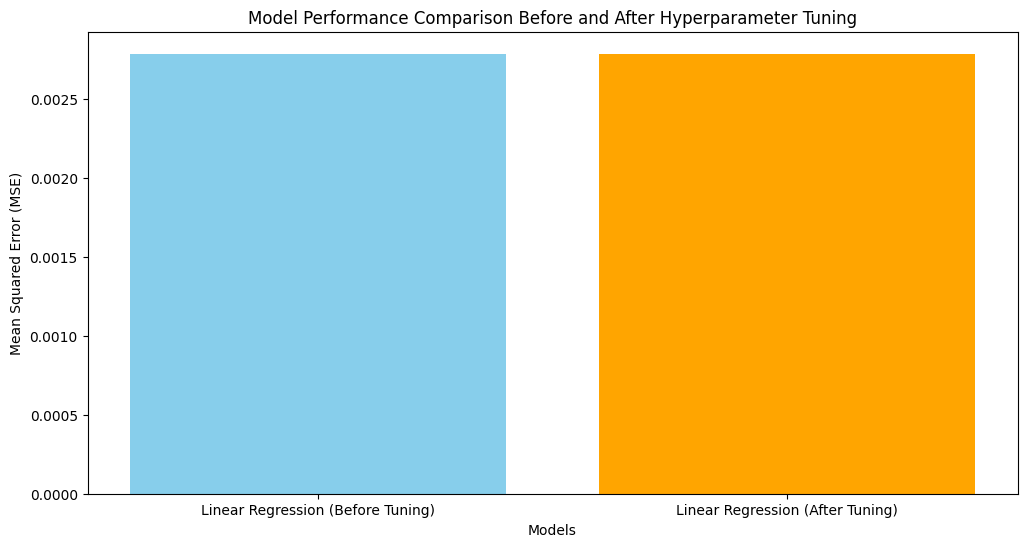

In [37]:
# Visualization of model performances before and after hyperparameter tuning
model_names = ['Linear Regression (Before Tuning)', 'Linear Regression (After Tuning)']
mse_values = [mse_before, mse]

plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
#plt.ylim(0, max(mse_values) + 0.1)
plt.show()

**Observation:**

1.   The hyperparameters that yielded the best performance for the model are specified as {'fit_intercept': True, 'positive': False}
2.   The MSE on the test set is approximately 0.00278. A lower MSE indicates that the model's predictions are, on average, closer to the actual values.
The values of MSE reamins same before and after hyperparameter tuning.




# **BI-DIRECTIONAL ELIMINATION USING WRAPPER METHOD**

Bidirectional Selection, functioning as a wrapper method in machine learning,

*   Bidirectional Selection, functioning as a wrapper method in machine learning,integrates both forward and backward selection procedures to determine the inclusion or exclusion of features based on model performance.


*  It exhibits enhanced robustness compared to singular forward or backward selection methods, as it concurrently evaluates the addition and removal of features. Its iterative adjustment of the feature set serves as a preventive measure against overfitting.





In [38]:

from sklearn.feature_selection import SequentialFeatureSelector

SequentialFeatureSelector is a most versatile tool for performing the feature selection process. Here we use this to perform bi directional elimination.

In [39]:

# Create SequentialFeatureSelector for forward and backward steps
#n_features_to_select=None: This setting enables the algorithm to automatically determine the optimal number of features.

#direction='forward': This choice indicates forward selection, where features are progressively added based on the highest score from cross-validation.

#cv=5: The parameter defines the number of folds used in cross-validation.
sfs = SequentialFeatureSelector(lin_reg, n_features_to_select=None,direction='forward',cv=5)
# Fit the SequentialFeatureSelector on the scaled training data
sfs.fit(X_train_scaled, Y_train_scaled)

# Find the selected features
selected_features_sfs = x.columns[sfs.support_]

# Printing  the selected features
print("Selected Features from SequentialFeatureSelector:")
print(selected_features_sfs)





/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Selected Features from SequentialFeatureSelector:
Index(['year', 'hour', 'holiday', 'weathersit', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'spring', 'summer', 'winter',
       'WorkingDay', 'monday'],
      dtype='object')


**Conclusion**


These features are considered the most relevant or influential based on the specified criteria, which could be the optimization of a chosen performance metric through cross-validation.

The selected features obtained from the bi-directional elimination as wrappetr method is:

'year', 'hour', 'holiday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'spring', 'summer', 'winter', 'WorkingDay', 'monday' are the selected features.

This machine learning model could potentially achieve good performance using only these selected features. The choice of these features is based on the optimization of the model's performance metric, and they are deemed to contribute significantly to the predictive power of the model for the given task or dataset.





**From the above features obtained applying it for linear regression **

In [40]:
selected_features = ['year', 'hour', 'holiday', 'weathersit', 'temp', 'atemp', 'humidity',
                     'windspeed', 'casual', 'registered', 'spring', 'summer', 'winter',
                     'WorkingDay', 'monday']

# Create feature matrix X using the selected features
x1 = bike_sharing_df[selected_features]

# Create target variable y
y1 = bike_sharing_df['Count']

In [41]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

Y_train_scaled1 = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled1 = scaler.fit_transform(Y_test.values.reshape(-1,1))


In [42]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train_scaled1, Y_train_scaled1)

# Make predictions on the test data
y_pred_sfs = lin_reg_model.predict(X_test_scaled1)
y_pred_train=lin_reg_model.predict(X_train_scaled1)

# Calculate Mean Squared Error on test data
mse_sfs = mean_squared_error(Y_test_scaled1, y_pred_sfs)


# Caluculate Mean squared error on train data
mse_train_sfs=mean_squared_error(Y_train_scaled1,y_pred_train)

In [43]:
# Print the Mean Squared Error
print(f'Mean Squared Error on Test Set with Selected Features: {mse_sfs}')
print(f'Mean Squared Error on train data with selected features: {mse_train}')

Mean Squared Error on Test Set with Selected Features: 0.0027843554445993626
Mean Squared Error on train data with selected features: 0.43779399392519464


**Observation:**
The mean squared error obtained with these selceted features from wrapper method is 0.0027

# **Comparison of features selection Between KNN and Bi-direcional elimination**

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Select k best features using f_regression (for regression tasks)
knn_selector = SelectKBest(score_func=f_regression, k=10)  # k value for number of features
X_train_knn_selected = knn_selector.fit_transform(X_train_scaled, Y_train_scaled)
X_test_knn_selected = knn_selector.transform(X_test_scaled)



# Getting  the selected features
selected_features_knn = x.columns[knn_selector.get_support()]
print("Selected Features using KNN:", selected_features_knn)

Selected Features using KNN: Index(['year', 'hour', 'temp', 'atemp', 'humidity', 'casual', 'registered',
       'summer', 'winter', 'jan'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
selected_features = ['year', 'hour', 'temp', 'atemp', 'humidity', 'casual', 'registered',
       'summer', 'winter', 'jan']

# Create feature matrix X using the selected features
x1 = bike_sharing_df[selected_features]

# Create target variable y
y1 = bike_sharing_df['Count']

In [94]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

Y_train_scaled1 = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled1 = scaler.fit_transform(Y_test.values.reshape(-1,1))

In [96]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled1, Y_train_scaled1)

# Make predictions on the test set
y_pred_knn1 = lin_reg_model.predict(X_test_scaled1)

# Calculate Mean Squared Error on test data
mse_knn = mean_squared_error(Y_test_scaled1, y_pred_knn1)


# Print the Mean Squared Error
print(f'Mean Squared Error on Test Set with Selected Features: {mse_knn}')

Mean Squared Error on Test Set with Selected Features: 0.0027843554445993817


**Conclusion:**


From the above results, we can observe that we get the same mean squared error regardless of the feature selected for this  dataset. When linear regression is applied with  KNN feature selection and bidirectional elimination feature selection with different features, we get the same mean squared error. In this dataset where the features have limited impact on the target variable, different subsets of features may not significantly alter the model's predictive ability.